# INTRODUCTION

With the following number images dataset, by CNN, we are going to discover if we can predict numbers by images.

# LIBRARIES AND DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In this array, it is how the machine sees the numbers, through  numbers which means color on the image.

In [5]:
single_pic = x_train[0]
single_pic

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

And this is how we can see it if we change numbers by color.

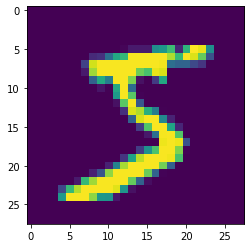

In [6]:
plt.imshow(single_pic)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# PREPROCESS

Before to start we need to change the values of our dataset, we can do this by using categorical values.

The to_categorical function takes a vector of class labels as input, and returns a matrix where each row corresponds to a sample, and each column corresponds to a class. The matrix is filled with binary values, where a value of 1 indicates that the corresponding sample belongs to the corresponding class, and a value of 0 indicates that it does not.

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_train.shape

(60000,)

In [10]:
y_example = to_categorical(y_train)

In [11]:
y_example.shape

(60000, 10)

In this case we add num_classes = 10 because we need aten columns so this argument is used to determine the number of columns in the resulting one-hot encoded matrix.

In [12]:
y_cast_test = to_categorical(y_test,num_classes = 10)

In [13]:
y_cast_train = to_categorical(y_train)

In [14]:
print(single_pic.max())
print(single_pic.min())

255
0


In [15]:
x_train = x_train/255
x_test = x_test/255

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
x_train = x_train.reshape(60000,28,28,1) #batch size, width, height, color channels
x_test = x_test.reshape(10000,28,28,1)

# TRAINING THE MODEL

For this training, we will need one layer with a MaxPool2D which is use to image detection and the Flatten layer is used to convert the output of the final pooling layer into a one-dimensional array, which can be passed to the fully connected layers for classification.

As output, just one layer and the compile we will add the metric of accuracy to our final report.

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [22]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation = "relu"))

#output layer

model.add(Dense(10, activation = "softmax"))

model.compile(loss="categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

We will use the Early Stopping to 
maximize our model at the best performance.

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stop = EarlyStopping(monitor="val_loss", patience = 1)
model.fit(x_train, y_cast_train, epochs=10, validation_data=(x_test, y_cast_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1432 - accuracy: 0.9572 - val_loss: 0.0470 - val_accuracy: 0.9842
Epoch 2/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0469 - accuracy: 0.9857 - val_loss: 0.0383 - val_accuracy: 0.9864
Epoch 3/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0306 - accuracy: 0.9902 - val_loss: 0.0475 - val_accuracy: 0.9851


We get our training results and plot them against different metrics.

In [24]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

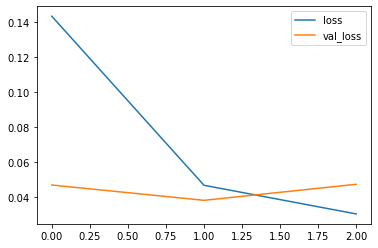

In [25]:
metrics[["loss", "val_loss"]].plot()

<AxesSubplot:>

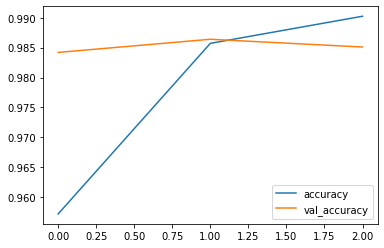

In [26]:
metrics[["accuracy", "val_accuracy"]].plot()

In [28]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
We get the result of our evaluation.

In [29]:
model.evaluate(x_test, y_cast_test, verbose=0)

[0.04745657369494438, 0.9850999712944031]

Let's see the final results of our model.

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

Now we make some predictions.

In [36]:
pre =  model.predict(x_test).argmax(axis=-1)

313/313 [==============================] - 2s 6ms/step


# FINAL RESULTS

We got a 99% of accuracy, which basically means we can predict numbers by images.

In [39]:
print(classification_report(y_test, pre))
print("**************************")
print(confusion_matrix(y_test, pre))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       0.98      1.00      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.98      0.98     10000
weighted avg       0.99      0.99      0.99     10000

**************************
[[ 972    1    1    0    0    0    4    1    1    0]
 [   0 1129    1    0    1    0    2    2    0    0]
 [   2    4 1011    0    1    0    1    6    7    0]
 [   0    0    3  998    0    2    0    4    3    0]
 [

<AxesSubplot:>

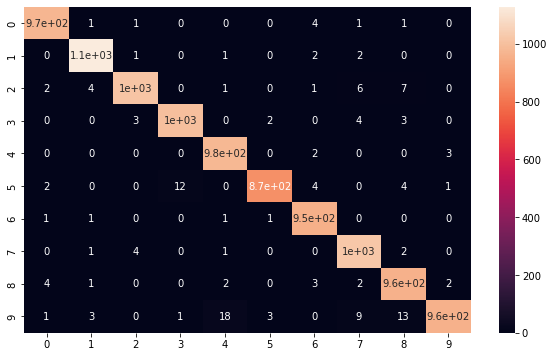

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, pre), annot = True)

# TESTING

We pick a number of our dataset.

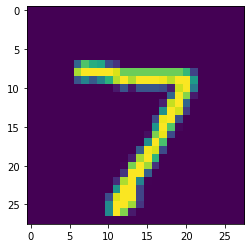

In [42]:
my_number = x_test[0]
plt.imshow(my_number.reshape(28,28))

In [45]:
my_number.shape

(28, 28, 1)

And the machine predicts the number seven which is correct.

In [54]:
pre_prob = model.predict(my_number.reshape(1,28,28,1))
predictions = np.argmax(pre_prob, axis=1)
predictions

1/1 [==============================] - 0s 36ms/step


array([7], dtype=int64)